## Fitting mutliple gaussians

Guessing these parameters:  {'amplitude': <Quantity 4.86852086 K>, 'mean': <Quantity 6.9708122 km / s>, 'stddev': <Quantity 1.65021004 km / s>}
Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
            K                km / s             km / s      
    ------------------ ----------------- -------------------
    3.4705698161175285 7.002847444534456 0.27787234460579024


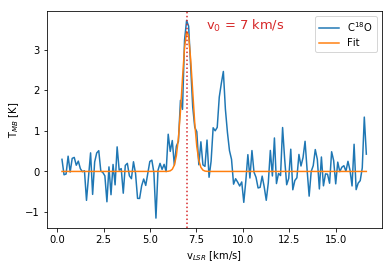

In [3]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(0, "..")
from stamp import *
from spectral_cube import wcs_utils

t_hops = Table.read("../../catalogs/hops.fits")
c12 = SpectralCube.read("../../cubes/mask_imfit_12co_pix_2_Tmb.fits")
c18 = SpectralCube.read("../../cubes/mask_imfit_c18o_pix_2_Tmb.fits")

sig12, sig13 = 0.86*u.K, 0.64*u.K

hops_169 = t_hops[t_hops["HOPS"] == 169][0]
coord = SkyCoord(hops_169["RAJ2000"], hops_169["DEJ2000"], unit=u.deg)
width=height=4*u.arcmin
vmin, vmax = -2*u.km/u.s, 4.7*u.km/u.s
sub12 = extract_subcube(c12, region_class=RectangleSkyRegion,
                      region_kwargs=dict(center=coord, width=width, height=height))
sub18 = extract_subcube(c18, region_class=RectangleSkyRegion,
                      region_kwargs=dict(center=coord, width=width, height=height))
sub18small_hops169 = extract_subcube(sub18, region_class=CircleSkyRegion,
                                    region_kwargs=dict(center=coord, radius=15*u.arcsec))

spec18_mean = extract_spectrum(sub18small_hops169, spectral_unit=u.km/u.s)
x, y = spec18_mean.spectral_axis, spec18_mean

spec18_gauss = fit_gaussian(x,y, autoguess=True)

print(spec18_gauss)

plt.plot(x, y, label=r"C$^{18}$O")
plt.plot(x.value,spec18_gauss(x).value, label=r"Fit")
plt.ylabel(r"T$_{MB}$ [K]")
plt.xlabel(r"v$_{LSR}$ [km/s]")
plt.axvline(spec18_gauss.mean.value, color='tab:red', ls=':')
plt.text(8,3.5,r"v$_0$ = {:.3g} km/s".format(spec18_gauss.mean.value), color='tab:red', size=13)
plt.legend()

In [4]:
d

NameError: name 'd' is not defined

Guessing these parameters:  {'amplitude': <Quantity 4.86852086 K>, 'mean': <Quantity 6.9708122 km / s>, 'stddev': <Quantity 1.65021004 km / s>}
[[3.47093376]
 [7.0028384 ]
 [0.27781125]
 [2.19270636]
 [8.85240622]
 [0.26272683]]


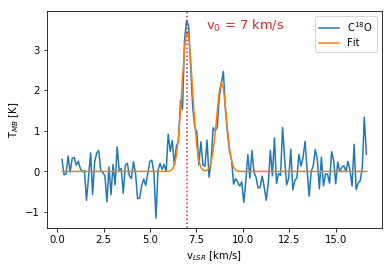

In [71]:
x, y = spec18_mean.spectral_axis, spec18_mean
# print(x.to(u.km/u.s),y)
spec18_gauss = fit_gaussian(x,y, autoguess=True)
spec18_2gauss = fit_gaussian(x,y, n_models=2,
                            gaussian_kwargs={"amplitude":1.*u.K, "mean":[7,10]*u.km/u.s, "stddev":1.*u.km/u.s})
# print(spec18_2gaussprint()spec18_2gprint()spec18_2gprint()spec18_2gprint()spec18_2gprint()spec18_2gprint()spec18_2gprint()spec18_2gprint())
# print(spec18_2gauss(x))
print(spec18_2gauss.param_sets)
plt.plot(x, y, label=r"C$^{18}$O")
# plt.plot(x.value,spec18_gauss(x).value, label=r"Fit")
plt.plot(x.value,spec18_2gauss(x.value), label=r"Fit")
plt.ylabel(r"T$_{MB}$ [K]")
plt.xlabel(r"v$_{LSR}$ [km/s]")
plt.axvline(spec18_gauss.mean.value, color='tab:red', ls=':')
plt.text(8,3.5,r"v$_0$ = {:.3g} km/s".format(spec18_gauss.mean.value), color='tab:red', size=13)
plt.legend()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 69.44115475635301
            Iterations: 29
            Function evaluations: 269
            Gradient evaluations: 29


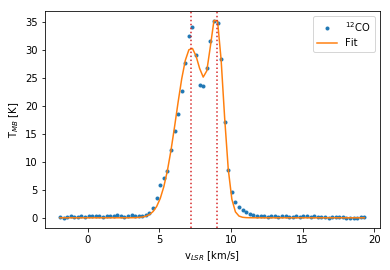

In [70]:
spec12_mean = extract_spectrum(sub12, spectral_unit=u.km/u.s)
x, y = spec12_mean.spectral_axis, spec12_mean

spec12_2gauss = fit_gaussian(x,y, n_models=2,
                            gaussian_kwargs={"amplitude":[30,35]*u.K, "mean":[7,9]*u.km/u.s, "stddev":[2,1.]*u.km/u.s},
                            fit_func=fitting.SLSQPLSQFitter())

# print(spec18_2gauss.param_sets)
plt.plot(x, y, ".", label=r"$^{12}$CO")
# plt.plot(x.value,spec18_gauss(x).value, label=r"Fit")
plt.plot(x.value,spec12_2gauss(x.value), label=r"Fit")
plt.ylabel(r"T$_{MB}$ [K]")
plt.xlabel(r"v$_{LSR}$ [km/s]")
plt.axvline(spec12_2gauss.mean_0.value, color='tab:red', ls=':')
plt.axvline(spec12_2gauss.mean_1.value, color='tab:red', ls=':')
# plt.semilogy()
# plt.ylim(0.01,100)
# plt.xlim(1,14)
# plt.text(8,3.5,r"v$_0$ = {:.3g} km/s".format(spec18_gauss.mean.value), color='tab:red', size=13)
plt.legend()